## ASSIGNMENT 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df=pd.concat([train,test])


In [3]:
train.shape,test.shape,df.shape
#891+418=1309
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df=df.drop(columns=["Name","Ticket"],axis=1)

In [5]:
df.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 112.5+ KB


columns with NUll values  -AGE,CABIN

In [7]:
df.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [8]:
df=df.drop(columns=["Cabin"],axis=1)

In [9]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])


In [10]:
df = df.fillna(method='ffill', axis=0)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 102.3+ KB


In [12]:
# import numpy as np
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# data=df.drop(df["Survived"], axis=1)
# imputer.fit(data.values)
# df["Survived"] = imputer.transform(df["Survived"])


In [13]:
# df = df[~df.index.duplicated(keep='first')]
# 
# sns.pairplot(df,corner = True, hue = 'Survived');


C:\Users\91906\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

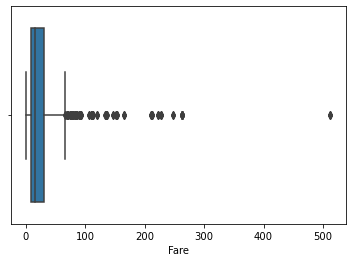

In [20]:
import seaborn as sns
sns.boxplot(df.Fare)


C:\Users\91906\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass'>

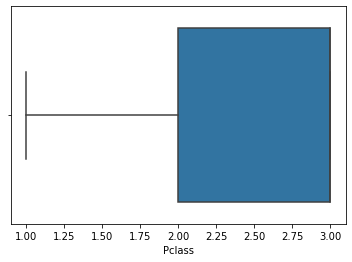

In [21]:
sns.boxplot(df.Pclass)


C:\Users\91906\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

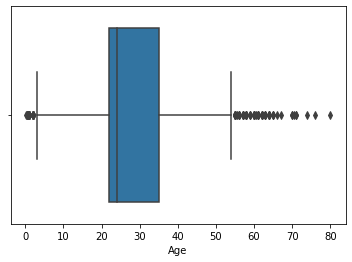

In [22]:
sns.boxplot(df.Age)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int32  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   int32  
dtypes: float64(3), int32(2), int64(4)
memory usage: 92.0 KB


In [24]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df['Embarked']=le.fit_transform(df['Embarked'])

In [25]:
# define the lower and upper bounds using Tukey's method
q1, q3 = np.percentile(df, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# remove outliers with values outside the bounds
filtered_data = df[(df >= lower_bound) & (df <= upper_bound)]


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 102.3 KB


In [23]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
413,1305,0.0,3,1,24.0,0,0,8.0500,2
414,1306,0.0,1,0,39.0,0,0,108.9000,0
415,1307,0.0,3,1,38.5,0,0,7.2500,2
416,1308,0.0,3,1,24.0,0,0,8.0500,2


## ASSIGNMENT 4

We have given a collection of 8 points.

P1=[0.1,0.6]

P2=[0.15,0.71]

P3=[0.08,0.9]

P4=[0.16, 0.85]

P5=[0.2,0.3]

P6=[0.25,0.5]

P7=[0.24,0.1]

P8=[0.3,0.2]
- Perform the k-mean clustering with initial centroids as m1=P1 =Cluster#1=C1 and
m2=P8=cluster#2=C2.
- Answer the following

-- 1] Which cluster does P6 belong to?
-- 2] What is the population of cluster around m2?
-- 3] What is updated value of m1 and m2?


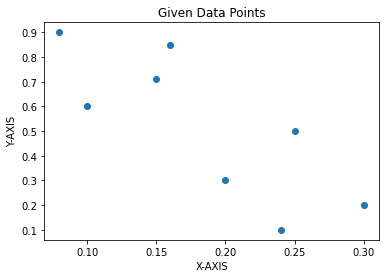

In [24]:
import numpy as np
from sklearn.cluster import KMeans

# defining the points
points = np.array([[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85], [0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]])
import matplotlib.pyplot as plt

plt.scatter(points[:,0], points[:,1], cmap='viridis')
plt.title('Given Data Points')
plt.xlabel('X-AXIS')
plt.ylabel('Y-AXIS')
plt.show()


#### APPLYING KMEANS CLUSTERING

In [25]:
# define the initial centroids
centroids = np.array([[0.1, 0.6], [0.3, 0.2]])
kmeans = KMeans(n_clusters=2, init=centroids)
kmeans.fit(points)

# get the labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# print the labels and centroids
print("Labels: ", labels,"\n")
print("Centroids: ", centroids)


C:\Users\91906\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)
C:\Users\91906\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Labels:  [0 0 0 0 1 0 1 1] 

Centroids:  [[0.148      0.712     ]
 [0.24666667 0.2       ]]


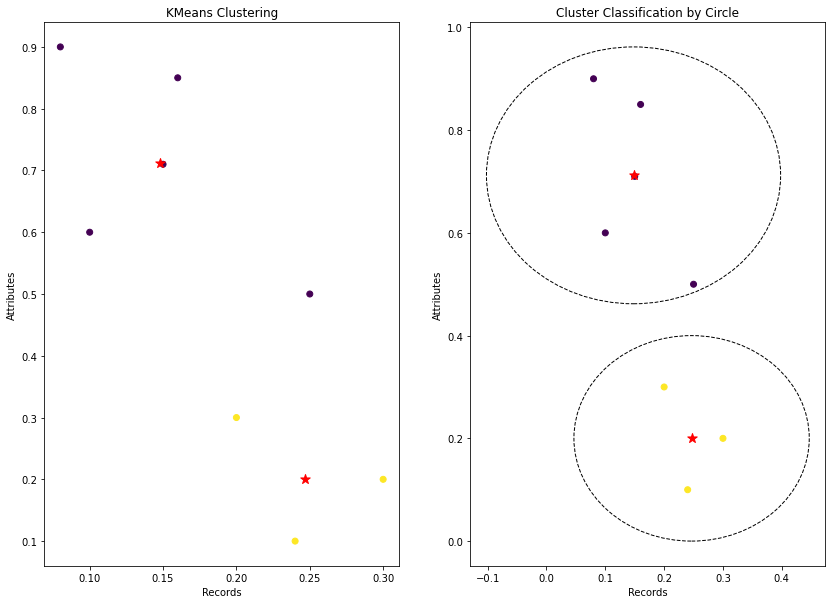

In [26]:

import matplotlib.pyplot as plt
from matplotlib.patches import Circle


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 10))

# Plot the points with the assigned cluster color
scatter = ax1.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis')
scatter = ax1.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='r')
ax1.set_title('KMeans Clustering')

# Create two circle patches
circle1 = Circle(centroids[0], radius=0.25, fill=False, linestyle='--')
circle2 = Circle(centroids[1], radius=0.2, fill=False, linestyle='--')

# Plot the points with the assigned circle color
scatter = ax2.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis')
scatter = ax2.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='r')

# Adding the circle patches to the plot
ax2.add_patch(circle1)
ax2.add_patch(circle2)
ax2.set_title('Cluster Classification by Circle')

for ax in (ax1, ax2):
    ax.set_xlabel('Records')
    ax.set_ylabel('Attributes')

# Show the plot
plt.show()
